# Exercice 0 : échauffement

Q1. Donnez, dans la direction 3’→ 5’, la séquence codée par le brin d'ADN suivant :

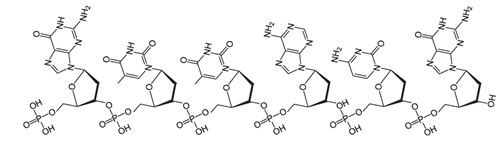

```markdown
GCATTG
```

Q2. Quelle est le peptide codé par la séquence d’ARNm suivante ?

3’– AUAACCAAUAUGCAAGUACAUGCA – 5’


```markdown
ACG UAC AUG AAC GUA UAA CCA AUA
 X   X  Met Asn Val X   X   X
```

Q3.	Donnez toutes les séquences d'ARN (AUGC) possibles codant pour la séquence peptidique : TrpGluIleTyr.

```markdown
UGG GAA AUU UAU
UGG GAA AUU UAC
UGG GAA AUC UAU
UGG GAA AUC UAC
UGG GAA AUA UAU
UGG GAA AUA UAC
UGG GAG AUU UAU
UGG GAG AUU UAC
UGG GAG AUC UAU
UGG GAG AUC UAC
UGG GAG AUA UAU
UGG GAG AUA UAC
```

# Exercice 1 : Annotation de cadres de lectures ouverts

Voici en cadeau le code génétique

In [1]:
genecode = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}


Q1. Téléchargez à partir de

https://www.ncbi.nlm.nih.gov/datasets/genome/

la séquence complète du génome de l’Adeno Associated Virus 2 (AAV2, identifiant NC_001401.2), **au format FASTA**.
La séquence doit faire 4679 bp.

Q2. Expliquez le format FASTA.



```markdown
Le format FASTA est un format utilisé pour écrire des séquences de nucléotides. Les séquences commencent par le caractère '>', dans laquelle les acides aminés ou nucléotides sont représentés par codes à une lettre
```

## Cadres de lecture ouverts
L’annotation de séquences consiste à trouver les différents éléments présents dans une séquence (e.g. un génome), en particulier la position des différents gènes. Une manière grossière de trouver où sont les gènes est de trouver les cadres de lecture ouverts (Open Reading Frames ORFs) qui correspondent à toutes les sous-séquences entre un codon start et un codon STOP.

Q1.	Rappelez la définition d’un codon.

```markdown
Un codon est une succession de 3 nucléotides spécifiant un acide aminé particulier.
```

Q2.	Quels sont les codons START canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
Le codon START est AUG, correspondant à la méthionine. Il signale le début de la traduction.
```

Q3.	Quels sont les codons STOP canoniques. Pour quel(s) acide(s) aminé(s) codent-ils ? En quoi sont-ils spéciaux ?

```markdown
UAA, UAG, UGA, et ils ne codent pour aucun acide, et signalent la fin de la traduction.
```

Q4. Dans quelle direction un brin d’ADN est-il lu ?

```markdown
Il est lu de 3' à 5'.
```

Q5. Comment se structure la molécule d'ADN dans une cellule ?

```markdown
En 2 brins, l'un orienté 3' 5' et l'autre orienté de 5' à 3'.
```

Q6. Quel(s) brin(s) de la molécule d'ADN peut (peuvent) porter un gène ?

```markdown
N'importe quel brin de la molécule d'adn peut porter un gène.
```

Q7. Qu’est-ce que le cadre de lecture ? Combien en existe-t-il ?

```markdown
C'est le point d'accroche pour lire la séquence d'arn. Il en existe 3. (cadre 0, cadre +1 et cadre +2, ces deux derniers cadres apparaissant dans le cadre de mutations.)
```

Q8. Quand utilise-t-on un cadre de lecture pour interpréter une séquence d’ADN ?

```markdown
On lit de 3 en 3 à partir du moment où l'on trouve un codon AUG.
```

Q9.	Donnez l’ensemble des ORFs présents dans le génome de l’AAV2. Présentez vos résultats au format FASTA où pour chaque ORF vous fournissez les informations :
```MARKDOWN
> pos début, pos fin, brin
séquence
```
où "pos début" est la position du premier nucléotide du codon START et "pos fin" est la position du dernier nucléotide du codon STOP (les positions sont comptées depuis le début du brin), brin est l'orientation du brin + ou - (+ est la séquence de base; - est le brin complément inverse) et séquence est simplement la séquence.

In [9]:
#!pip install biopython
from Bio import SeqIO

def find_orfs(sequence, orientation="+"):
    start_codon = "ATG"
    stop_codons = {"TAA", "TAG", "TGA"}
    orfs = []
    seq_len = len(sequence)

    for frame in range(3):
        pos = frame
        while pos < seq_len - 2:
            codon = sequence[pos:pos+3]
            if codon == start_codon:
                for stop in range(pos + 3, seq_len - 2, 3):
                    if sequence[stop:stop+3] in stop_codons:
                        orfs.append((pos+1, stop+3, orientation, sequence[pos:stop+3]))  # 1-based index
                        break
            pos += 3

    return orfs

fasta_file = "GCF_000838645.1_ViralProj14060_genomic.fna"
record = next(SeqIO.parse(fasta_file, "fasta"))

seq_plus = str(record.seq)
seq_minus = str(record.seq.reverse_complement())

orfs_plus = find_orfs(seq_plus, orientation="+")
orfs_minus = find_orfs(seq_minus, orientation="-")

all_orfs = orfs_plus + orfs_minus

with open("AAV2_ORFs.fasta", "w") as output_file:
    for i, (start, end, orientation, seq) in enumerate(all_orfs):
        header = f">ORF_{i+1} | start={start} | end={end} | strand={orientation}"
        output_file.write(f"{header}\n{seq}\n")

print(f"Nombre total d'ORFs trouvés : {len(all_orfs)}")
print("Résultats enregistrés dans 'AAV2_ORFs.fasta'")
print(len(orfs_minus))
print(len(orfs_plus))

Nombre total d'ORFs trouvés : 117
Résultats enregistrés dans 'AAV2_ORFs.fasta'
57
60


Q10.	Combien d’ORFS trouvez-vous ?

In [4]:
117

117

Q11. Affichez les ORFs le long du génome sous forme d'un graphe (en x les positions le long du génome, en y "l'id" de l'ORF) où chaque ORF est représentée per une ligne horizontale entre les positions de départ de de fin et une valeur y par ORF.

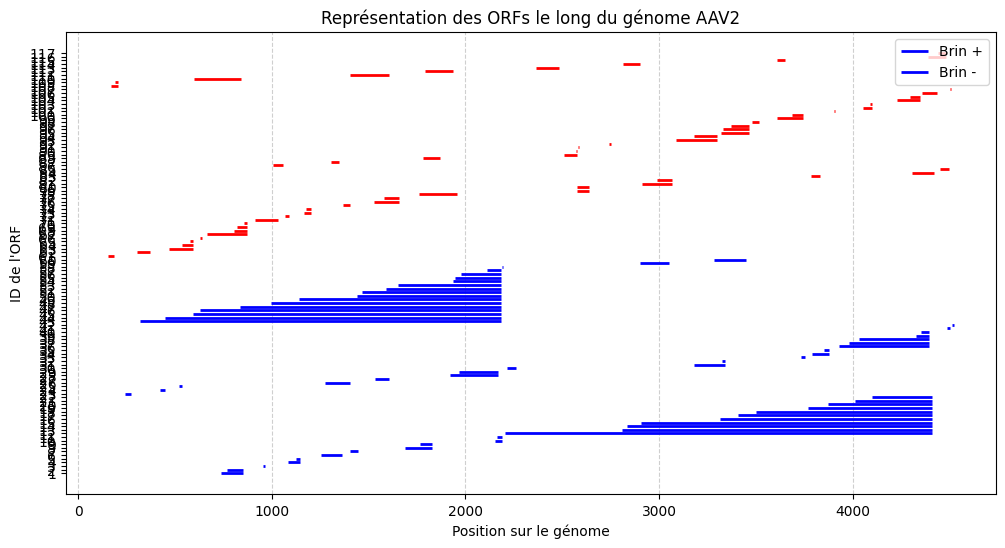

In [6]:
import matplotlib.pyplot as plt

# Tracer le graphe
plt.figure(figsize=(12, 6))

for i, (start, end, orientation, _) in enumerate(all_orfs):
    y_val = i + 1  # Chaque ORF a une position unique en Y
    color = 'blue' if orientation == "+" else 'red'
    plt.hlines(y=y_val, xmin=start, xmax=end, colors=color, linewidth=2, label=f"ORF {i+1}" if i < 1 else "")

# Labels et affichage
plt.xlabel("Position sur le génome")
plt.ylabel("ID de l'ORF")
plt.title("Représentation des ORFs le long du génome AAV2")
plt.yticks(range(1, len(all_orfs) + 1))  # Un ID unique par ORF
plt.legend(["Brin +", "Brin -"], loc="upper right")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


Q12. En considérant que les différentes la probabilité d’apparition d’un nucléotide à chaque position le long d’un génome sont indépendantes, quelle est la probabilité d’apparition d’un codon START en fonction de la probabilité d’apparition des différents nucléotides $p_A,p_T,p_G,p_C$ ?

```markdown
pA * pT * pG
```

Q13. Avec le même modèle, quelle est la probabilité d'apparition d'un codon STOP ?

```markdown
P(STOP)=p(UAA) + p(UGA) + p(UAG)
```

Q14. Affichez les probabilités d'apparition des codons START et STOP le long du génome de l’AAV2. Pour chaque position vous utilisez une fenêtre glissante de 501 nucléotide centrée sur cette position pour calculer la fréquence d’apparition des différents nucléotides (vous pouvez négliger les 501 premièrs et dernières nucléotides).

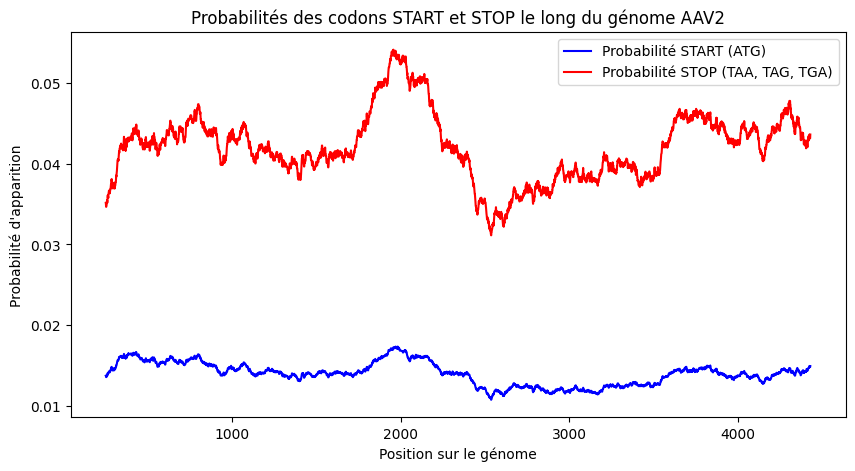

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO

fasta_file = "GCF_000838645.1_ViralProj14060_genomic.fna"
record = next(SeqIO.parse(fasta_file, "fasta"))
sequence = str(record.seq)

start_codon = "ATG"
stop_codons = {"TAA", "TAG", "TGA"}

window_size = 501
half_window = window_size // 2

positions = []
prob_start = []
prob_stop = []

def calculate_nucleotide_frequencies(subseq):
    total = len(subseq)
    freq_A = subseq.count("A") / total
    freq_T = subseq.count("T") / total
    freq_G = subseq.count("G") / total
    freq_C = subseq.count("C") / total
    return freq_A, freq_T, freq_G, freq_C

for i in range(half_window, len(sequence) - half_window):
    window_seq = sequence[i - half_window : i + half_window + 1]

    p_A, p_T, p_G, p_C = calculate_nucleotide_frequencies(window_seq)

    p_start = p_A * p_T * p_G

    p_TAA = p_T * p_A * p_A
    p_TAG = p_T * p_A * p_G
    p_TGA = p_T * p_G * p_A
    p_stop = p_TAA + p_TAG + p_TGA

    positions.append(i)
    prob_start.append(p_start)
    prob_stop.append(p_stop)

plt.figure(figsize=(10, 5))
plt.plot(positions, prob_start, label="Probabilité START (ATG)", color="blue")
plt.plot(positions, prob_stop, label="Probabilité STOP (TAA, TAG, TGA)", color="red")
plt.xlabel("Position sur le génome")
plt.ylabel("Probabilité d'apparition")
plt.title("Probabilités des codons START et STOP le long du génome AAV2")
plt.legend()
plt.show()


Q15.	Téléchargez l’annotation du génome à partir de Genbank :

https://www.ncbi.nlm.nih.gov/datasets/gene/GCF_000838645.1/

Comparez les ORFS que vous avez trouvé avec le génome annoté (on s’intéresse à l’annotation « gene »).

In [17]:
fasta_file = "GCF_000838645.1_ViralProj14060_genomic.fna"
record = next(SeqIO.parse(fasta_file, "fasta"))

seq_plus = str(record.seq)
seq_minus = str(record.seq.reverse_complement())

orfs_plus = find_orfs(seq_plus, orientation="+")
orfs_minus = find_orfs(seq_minus, orientation="-")

all_orfs = orfs_plus + orfs_minus

with open("AAV2_ORFs_annotated.fasta", "w") as output_file:
    for i, (start, end, orientation, seq) in enumerate(all_orfs):
        header = f">ORF_{i+1} | start={start} | end={end} | strand={orientation}"
        output_file.write(f"{header}\n{seq}\n")

print(f"Nombre total d'ORFs trouvés : {len(all_orfs)}")
print("Résultats enregistrés dans 'AAV2_ORFs_annotated.fasta'")
print(len(orfs_minus))
print(len(orfs_plus))

Nombre total d'ORFs trouvés : 117
Résultats enregistrés dans 'AAV2_ORFs_annotated.fasta'
57
60


Q16. Qu’observez-vous ?

```markdown
Votre réponse ici
```

# Exercice 2 : biais d’utilisation des codons

Le code génétique étant redondant, plusieurs codons codent pour un même acide aminé. A l’inverse, cela veut dire que pour stocker un même acide aminé dans le génome, un organisme a différentes possibilités. Dans cet exercice, on va étudier si différents organismes ont des préférences différentes pour coder différents acides aminés ?

Q1. Récupperez les génomes des organismes suivants à partir de Genbank:
1.	AAV2 - NC_001401.2
2.	Plasmodium Falciparum 3D7 Chromosome 9 – AL844508
3.	Escherichia coli souche BL21 - NZ_CP053601
4.	Homo Sapiens Chromosome 10 build GRCh38.p14 - NC_000010.11

Q2. Calculez la fréquence d’apparition de chaque codon présents dans chacun de ces génomes.

In [26]:
from collections import Counter
from Bio import SeqIO

def count_codons(fasta_file):
    record = next(SeqIO.parse(fasta_file, "fasta"))
    sequence = str(record.seq)

    sequence = sequence[:len(sequence) - (len(sequence) % 3)]

    codons = [sequence[i:i+3] for i in range(0, len(sequence), 3)]

    codon_counts = Counter(codons)
    total_codons = sum(codon_counts.values())
    codon_freq = {codon: count / total_codons for codon, count in codon_counts.items()}

    return dict(sorted(codon_freq.items(), key=lambda x: x[1], reverse=True))

fasta_files = {
    "AAV Virus": "GCF_000838645.1_ViralProj14060_genomic.fna",
    "E. coli": "GCF_000002765.6_GCA_000002765_genomic.fna",
    "Plasmodium": "GCF_013166975.1_ASM1316697v1_genomic.fna"
}

codon_frequencies = {name: count_codons(file) for name, file in fasta_files.items()}

for genome, freqs in codon_frequencies.items():
    print(f"\n### Fréquences des codons pour {genome} ###")
    for codon, freq in freqs.items():
        print(f"{codon}: {freq:.4f}")



### Fréquences des codons pour AAV Virus ###
TGG: 0.0308
GGA: 0.0295
AAC: 0.0289
CCA: 0.0276
CAG: 0.0276
AGA: 0.0263
GAC: 0.0263
AGC: 0.0244
GAG: 0.0218
AAG: 0.0218
TTT: 0.0218
AGG: 0.0218
ACG: 0.0218
CCT: 0.0212
ACT: 0.0205
CTC: 0.0205
ACC: 0.0199
AAT: 0.0199
CCG: 0.0192
TCA: 0.0192
GCC: 0.0186
ACA: 0.0186
TCT: 0.0180
GCG: 0.0180
TAC: 0.0180
CCC: 0.0173
GTG: 0.0173
ATC: 0.0173
GGT: 0.0173
CTG: 0.0167
GGC: 0.0167
TGA: 0.0160
TTC: 0.0160
AAA: 0.0160
GCA: 0.0154
ATG: 0.0148
TCG: 0.0141
CGC: 0.0135
ATT: 0.0135
GAA: 0.0135
TTG: 0.0128
TGC: 0.0128
GTC: 0.0122
CGG: 0.0122
GGG: 0.0115
CGA: 0.0115
TCC: 0.0115
AGT: 0.0115
CTT: 0.0115
GCT: 0.0103
CAC: 0.0103
GTT: 0.0103
CAA: 0.0103
GAT: 0.0071
GTA: 0.0064
CAT: 0.0064
CGT: 0.0058
TAA: 0.0051
TGT: 0.0051
TAG: 0.0038
TTA: 0.0038
ATA: 0.0038
TAT: 0.0038
CTA: 0.0026

### Fréquences des codons pour E. coli ###
ata: 0.0698
tat: 0.0671
aaa: 0.0624
ttt: 0.0554
aat: 0.0395
att: 0.0340
tta: 0.0335
taa: 0.0335
AAA: 0.0172
TTT: 0.0160
AAT: 0.0155
ATA: 0.014

Q3. Affichez les résultats sous forme de heatmap avec en axe x les acides aminés et en axe y les codons. Chaque case représente en niveau de couleur la fréquence d'apparition d'un codon pour un acide aminé.

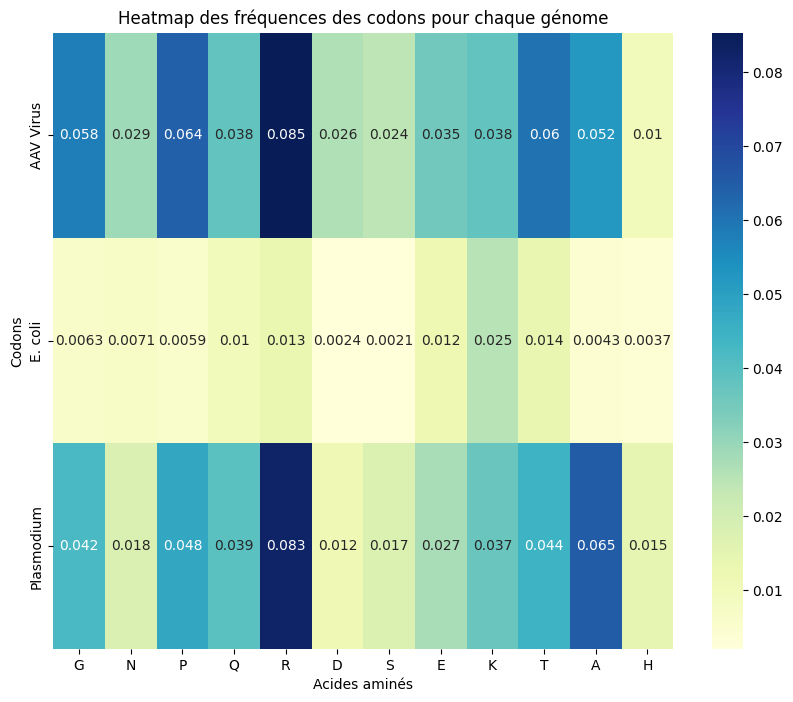

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

codon_to_amino_acid = {
    "UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L",
    "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
    "AUU": "I", "AUC": "I", "AUA": "I", "AUG": "M",
    "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
    "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
    "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "UAU": "Y", "UAC": "Y", "UAA": "Stop", "UAG": "Stop", "UGA": "Stop",
    "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
    "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
    "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
    "UGU": "C", "UGC": "C", "UGG": "W", "CGU": "R",
    "CGC": "R", "CGA": "R", "CGG": "R", "AGU": "S",
    "AGC": "S", "AGA": "R", "AGG": "R", "GGU": "G",
    "GGC": "G", "GGA": "G", "GGG": "G"
}

heatmap_data = {}

for genome, freqs in codon_frequencies.items():
    row = {}
    for codon, freq in freqs.items():
        aa = codon_to_amino_acid.get(codon)
        if aa:
            if aa not in row:
                row[aa] = 0
            row[aa] += freq
    heatmap_data[genome] = row

df = pd.DataFrame(heatmap_data).T
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Heatmap des fréquences des codons pour chaque génome")
plt.xlabel("Acides aminés")
plt.ylabel("Codons")
plt.show()


Q4. Ces heatmaps sont-elles similaires ?

```markdown
AAV2 et plasmodium oui, pas E.coli
```

# Exercice 3 : optimisation de codons

L’exercice précédent nous a montré qu’il existait bien un biais dans l’utilisation des codons synonymes entre différents organismes. En pratique, si une séquence d’ADN d’un organisme ne suit pas son biais d'utilisation de codons, cela peut avoir un impact sur sa vitesse de traduction et donc la quantité de protéines associées.

Si on souhaite introduire dans un organisme un gène provenant d’un autre organisme il est donc préférable d’optimiser la séquence selon les biais de codons de l’organisme cible.

Q1. Créer un code qui prend en entrée une séquence d’ADN codante et une table de fréquence d’utilisation des codons pour un organisme et retourne la séquence produisant la même protéine mais utilisant uniquement les codons les plus fréquemment utilisés selon la table donnée.

In [43]:
codon_frequencies = {
    "A": {"GCT": 0.3, "GCC": 0.4, "GCA": 0.2, "GCG": 0.1},
    "C": {"TGT": 0.6, "TGC": 0.4},
    "D": {"GAT": 0.5, "GAC": 0.5},
}

codon_to_amino_acid = {
    "GCT": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "TGT": "C", "TGC": "C",
    "GAT": "D", "GAC": "D",
}

def translate_dna_to_protein(dna_sequence):
    protein = []
    for i in range(0, len(dna_sequence), 3):
        codon = dna_sequence[i:i+3]
        if codon in codon_to_amino_acid:
            protein.append(codon_to_amino_acid[codon])
    return protein

def get_most_frequent_codon(amino_acid, codon_frequencies):
    codons = codon_frequencies.get(amino_acid)
    if not codons:
        return None
    return max(codons, key=codons.get)

def optimize_dna_sequence(dna_sequence, codon_frequencies):
    protein = translate_dna_to_protein(dna_sequence)

    optimized_sequence = []
    for amino_acid in protein:
        most_frequent_codon = get_most_frequent_codon(amino_acid, codon_frequencies)
        if most_frequent_codon:
            optimized_sequence.append(most_frequent_codon)

    return ''.join(optimized_sequence)

dna_sequence = "GCTGCCGATGAGAC"
optimized_dna = optimize_dna_sequence(dna_sequence, codon_frequencies)
print(f"Original DNA sequence: {dna_sequence}")
print(f"Optimized DNA sequence: {optimized_dna}")


Original DNA sequence: GCTGCCGATGAGAC
Optimized DNA sequence: GCCGCCGAT


Q2. On va combiner les deux derniers exercices: écrivez un code qui prend en entrée un id de génome et une séquence à optimiser. Votre code télécharge le génome, calcule la table de biais de codons et optimise la séquence d'entrée pour cette table.

In [46]:
from Bio import Entrez, SeqIO
import numpy as np
from collections import Counter

codon_to_amino_acid = {
    "UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L",
    "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
    "AUU": "I", "AUC": "I", "AUA": "I", "AUG": "M",
    "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
    "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
    "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "UAU": "Y", "UAC": "Y", "UAA": "Stop", "UAG": "Stop", "UGA": "Stop",
    "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
    "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
    "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
    "UGU": "C", "UGC": "C", "UGG": "W", "CGU": "R",
    "CGC": "R", "CGA": "R", "CGG": "R", "AGU": "S",
    "AGC": "S", "AGA": "R", "AGG": "R", "GGU": "G",
    "GGC": "G", "GGA": "G", "GGG": "G"
}

def download_genome(genome_id):
    handle = Entrez.efetch(db="nucleotide", id=genome_id, rettype="gb", retmode="text")
    record = SeqIO.read(handle, "genbank")
    return str(record.seq)

def calculate_codon_bias(genome_sequence):
    codon_table = {}
    for i in range(0, len(genome_sequence) - 2, 3):
        codon = genome_sequence[i:i+3]
        if len(codon) == 3:
            if codon in codon_table:
                codon_table[codon] += 1
            else:
                codon_table[codon] = 1
    total_codons = sum(codon_table.values())
    codon_bias = {codon: count / total_codons for codon, count in codon_table.items()}
    return codon_bias

def optimize_sequence(input_sequence, codon_bias):
    start_codon = input_sequence[:3]
    optimized_sequence = [start_codon]
    for i in range(3, len(input_sequence) - 3, 3):
        codon = input_sequence[i:i+3]
        if codon in codon_bias:
            best_codon = max(codon_bias, key=codon_bias.get)
            optimized_sequence.append(best_codon)
        else:
            optimized_sequence.append(codon)
    return "".join(optimized_sequence)

genome_id = "NC_001401.2"
input_sequence = "ATGCTGCCGATGAGAC"
genome_sequence = download_genome(genome_id)
codon_bias = calculate_codon_bias(genome_sequence)
optimized_sequence = optimize_sequence(input_sequence, codon_bias)

print(f"Original Sequence: {input_sequence}")
print(f"Optimized Sequence: {optimized_sequence}")



Original Sequence: ATGCTGCCGATGAGAC
Optimized Sequence: ATGTGGTGGTGGTGG
